# ZUBER Ride Sharing ~ CHICAGO

## Introduction <a id='intro'></a>
This study aims to analyze ride patterns and user behaviour/preferences in terms of ride-hailing services across the Chicago area. We'd like to find out who the main competitors of Zuber are, where our prospective customers are heading and how external factors like weather affects ride-hailing services. As the nature of ride-sharing is still relatively novel, we have a chance to disrupt the market status-quo.

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Libraries & Data Loading](#lib)
* [Stage 2. Data overview](#do)
    * [Conclusions](#doconclusions)
* [Stage 3. Data preprocessing](#dp)
    * [Conclusions](#dpconclusions)
* [Stage 4. User Behaviour](#ub)
    * [4.1. Top 10 Ride Destinations](#destination)
        * [Conclusion](#destination_conclusion)
    * [4.2. Major Taxi Companies in the Chicago Area](#taxi_companies)
        * [Conclusion](#taxi_companies_conclusion)
* [Stage 5. Hypothesis Testing on Weather and Taxi Rides](#ht)
    * [Conclusion](#ht_conclusion)
* [Findings & Overall Conclusion](#findings)

# 1. Libraries & Data Loading <a id='lib'></a>

In [1]:
# Importing libraries:

import pandas as pd
import numpy as np
import math as mt
import scipy.stats as st
import matplotlib.pyplot as plt 

In [2]:
# Loading DataFrames:

try: 
    df_taxi = pd.read_csv('project_sql_result_01.csv')
    df_trips = pd.read_csv('project_sql_result_04.csv')
    df_loop_ohare = pd.read_csv('project_sql_result_07.csv')

    
except: 
    df_taxi = pd.read_csv('/datasets/project_sql_result_01.csv')
    df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
    df_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

# 2. Data Overview <a id='do'></a>

In [3]:
# df_taxi overview:

display(df_taxi.head())
display(df_taxi.info())
df_taxi.describe()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
# df_taxi duplicate check:

df_taxi[df_taxi.duplicated()].sum()

company_name    0.0
trips_amount    0.0
dtype: float64

In [5]:
# df_trips overview:

display(df_trips.head())
display(df_trips.info())
df_trips.describe()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [6]:
# df_trips duplicate check:

df_trips[df_trips.duplicated()].sum()

dropoff_location_name    0.0
average_trips            0.0
dtype: float64

In [7]:
# df_loop_ohare overview:

display(df_loop_ohare.head())
display(df_loop_ohare.info())
df_loop_ohare.describe()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Conclusions <a id='doconclusions'></a>
In the Loop-O'Hare table, our start_ts column requires transformation to the DateTime type. Duration_seconds needs conversion to the INT type as well, while we observe a minimum of 0.00 seconds trip durations. We will investigate this further.

[Back to Contents](#back)

# 3. Data Preprocessing <a id='dp'></a>

In [8]:
# Converting duration_seconds to the INT type:

df_loop_ohare.duration_seconds = df_loop_ohare.duration_seconds.astype('int16')

In [9]:
# Converting start_ts to DateTime:

df_loop_ohare.start_ts = pd.to_datetime(df_loop_ohare.start_ts, format="%Y-%m-%d %H:%M:%S")

In [10]:
# Fix check:

df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.9+ KB


In [11]:
# Investigating duration_seconds == 0:

df_loop_ohare.query("duration_seconds == 0")

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0
168,2017-11-11 07:00:00,Good,0
204,2017-11-18 19:00:00,Good,0
552,2017-11-04 01:00:00,Good,0
801,2017-11-04 09:00:00,Good,0
1063,2017-11-25 11:00:00,Good,0


In [12]:
# Calculating share of 0 values:

(df_loop_ohare['duration_seconds'] == 0).mean()

0.0056179775280898875

In [13]:
# Dropping entries of 0 duration_second values:

df_loop_ohare = df_loop_ohare.drop(df_loop_ohare.query("duration_seconds == 0").index)
df_loop_ohare.reset_index(drop=True, inplace=True)

In [14]:
# Fix check:

display(df_loop_ohare.info())
df_loop_ohare.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 18.8+ KB


None

,duration_seconds
count,1062.000000
mean,2083.435970
std,755.651796
min,60.000000
25%,1440.000000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Conclusions <a id='dpconclusions'></a>

Pertaining to the Loop-O'hare table: We found 6 entries with 0 values in its duration_seconds column. These can be considered as missing values, as they have either been mistakenly inputted during data collection or the passenger in question might have cancelled the trip altogether. Either ways, they do not provide any predictive value and only represent a small percentage share of our population - 0.5%, and thus were dropped from our DateFrame.  

[Back to Contents](#back)

# 4. User Behaviour <a id='ub'></a>

## 4.1. Top 10 Ride Destinations <a id='destination'></a>

In [15]:
# Extracting top-10 popular dropoff locations in the Chicago area:

top10_destinations = df_trips.sort_values('average_trips', ascending=False).head(10)

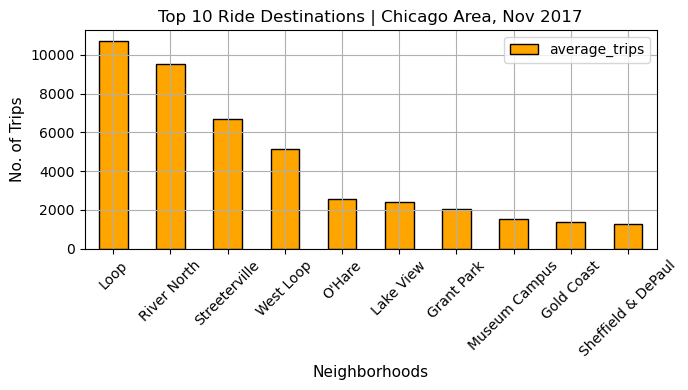

In [16]:
# Bar plot on popular destinations:

top10_destinations\
.plot(kind='bar', grid=True, edgecolor='black', color='orange', figsize=(7,4))

plt.title('Top 10 Ride Destinations | Chicago Area, Nov 2017', fontsize=12)
plt.xlabel('Neighborhoods', fontsize=11)
plt.ylabel('No. of Trips', fontsize=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], \
           labels=['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare", 'Lake View', 'Grant Park', \
                  'Museum Campus', 'Gold Coast', 'Sheffield & DePaul'], \
          rotation=45)
plt.tight_layout()
plt.show()

### Conclusions <a id='destination_conclusion'></a>

Being the central business district (CBD) of the city and the main section of downtown Chicago, it isn't surprising to see Chicago's Loop being the most frequently dropped-off destination. In fact, our top 4 are all represented by densely populated areas, comprising affluent residences, businesses, eateries, art galleries and the lot. 5th spot goes to the O'Hare Airport, which speaks for itself. 

[Back to Contents](#back)

## 4.2. Major Taxi Companies in the Chicago Area<a id='taxi_companies'></a>
In the following section, we'd like to determine the taxi companies that lead market share in the Chicago area. These companies represent our direct competitors in this space. We have a sample size of 2 days, for the 15th and 16th of November, 2017, and we will look at the total trips by each company across this duration.

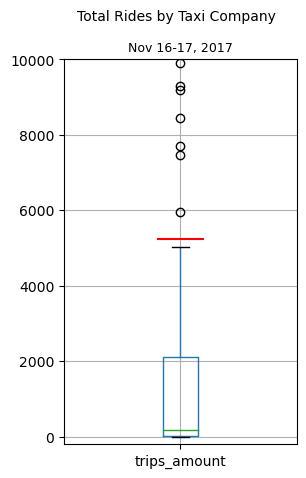

In [17]:
# Determining taxi companies that are dominating market share:

Q1 = df_taxi['trips_amount'].quantile(0.25)
Q3 = df_taxi['trips_amount'].quantile(0.75)
IQR = Q3 - Q1

(df_taxi
 .boxplot(column=['trips_amount'], grid=True, figsize=(3,5))
)
plt.suptitle('Total Rides by Taxi Company', fontsize=10)
plt.title('Nov 16-17, 2017', fontsize=9)
plt.ylim(-200, 10000)
plt.hlines(y=Q1-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.show()

In [18]:
# Slicing taxi companies above the upper threshold (outliers):

upper = Q3+1.5*IQR

top_taxi_companies = df_taxi.query("trips_amount > @upper")

In [19]:
# Calculating percentage share total trips of our outliers over Nov 15-16:

top_taxi_companies.trips_amount.sum() / df_taxi.trips_amount.sum()

0.7229719396115387

**Intermediate Conclusion:** Our taxi company outliers represent a percentage share out of over 72% of roughly 130,000 trips across the 15th and 16th of November, 2017 in the Chicago area. In this scenario, we'd like to dial in on these outliers as they represent the market leaders of whom are our main competitors in this space.

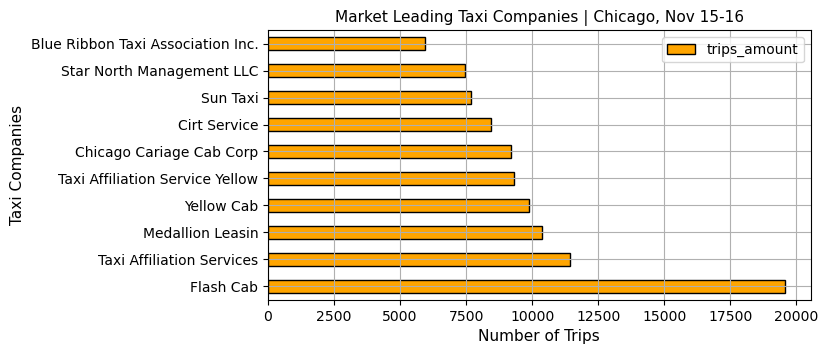

In [20]:
# Visualizing the top taxi companies with a bar chart:

(top_taxi_companies
 .plot(kind='barh', grid=True, edgecolor='black', color='orange', figsize=(7,3.5))
)

plt.title('Market Leading Taxi Companies | Chicago, Nov 15-16', fontsize=11)
plt.xlabel('Number of Trips', fontsize=11)
plt.ylabel('Taxi Companies', fontsize=11)
plt.yticks(
    ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], \
    labels=['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasin', 'Yellow Cab', 'Taxi Affiliation Service Yellow', 
        'Chicago Cariage Cab Corp', 'Cirt Service', 'Sun Taxi', 'Star North Management LLC', 
        'Blue Ribbon Taxi Association Inc.'],      
        )

plt.show()

In [21]:
# Getting the percentage share of Flash Cab, Taxi Affiliation Services and Taxi Affiliation Service Yellow:

(df_taxi.query("company_name == ['Flash Cab', 'Taxi Affiliation Services', 'Taxi Affiliation Service Yellow']")
 .trips_amount.sum()
  /
 df_taxi.trips_amount.sum()
)

0.29334139289641764

### Conclusion <a id='taxi_companies_conclusion'></a>

It's apparent that Flash Cab dominates the Chicago taxi space. However, if we consider Taxi Affiliation Services and Taxi Affiliation Service Yellow as a single entity, they immediately become our main competitior without question. These 3 companies account for almost 30% of our entire dataset. As a new entrant in the market and one of whose unique ride-sharing nature is the first of its kind, Zuber possesses the capabilities to disrupt the market if all things go to plan. These aforementioned companies should be our main priority in studying user brand preferences. The questions that need to be asked are:
> 1. Can we assume our market leaders have bigger fleets and therefore reduced wait times/increased accessibility for consumers?
2. Do our market leaders possess certain pulling traits that are not seen in other taxi companies? (ie; newer vehicles, vehicle spaciousness, hygiene etc.)
3. If we assess that our market leaders have more available taxis on the road in the average day, are these companies better to work for in terms of compensation/salary/wages? 

[Back to Contents](#back)

# 5. Hypothesis Testing on Weather and Ride Duration <a id='hp'></a>
Moving forward, we'd like to test the hypothesis that average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
<br><br>
> H0 - Average ride duration from Loop to O'Hare on rainy Saturdays remains the same.
<br>
H1 - Average ride duration from Loop to O'Hare on rainy Saturdays differs.

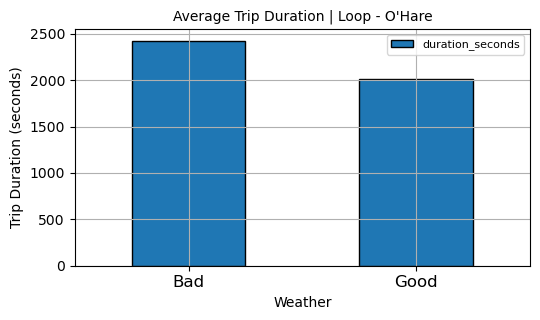

In [22]:
# Plotting average trip duration for Loop-O'Hare:

(df_loop_ohare
 .pivot_table(index='weather_conditions', values='duration_seconds', aggfunc='mean')
 .plot(kind='bar', edgecolor='black', grid=True, figsize=(5.5,3.3))
)

plt.legend(fontsize=8)
plt.title("Average Trip Duration | Loop - O'Hare", fontsize=10)
plt.xlabel('Weather', fontsize=10)
plt.ylabel('Trip Duration (seconds)', fontsize=10)
plt.xticks(rotation=360, fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
# Filtering good and bad weather data:

weather_good = df_loop_ohare.query("weather_conditions == 'Good'")
weather_bad = df_loop_ohare.query("weather_conditions == 'Bad'")

In [24]:
# Calculating difference in means of both samles:

display(weather_good.duration_seconds.mean())
weather_bad.duration_seconds.mean()

2013.2789115646258

2427.2055555555557

In [25]:
# Calculating variance difference between both samples:

display(weather_good.duration_seconds.var())
display(weather_bad.duration_seconds.var())

weather_bad.duration_seconds.var() / weather_good.duration_seconds.var() 

552889.2319951818

520294.086002483

0.9410457934312187

In [26]:
# T-test

alpha = 0.05

results = st.ttest_ind(weather_good.duration_seconds, weather_bad.duration_seconds, equal_var = False)
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("We reject the null hypothesis; Average trip durations for both weather conditions are different")
else:
    print("We can't reject the null hypothesis; Average trip durations for both weather conditions are similar")

p-value: 2.4173590471585584e-11
We reject the null hypothesis; Average trip durations for both weather conditions are different


### Conclusion <a id='ht_conclusion'></a>

We plotted a simple bar chart of average trip duration under both good and bad weather. Trips under bad weather were on average 7 minutes slower. Though we have a smaller sample size of bad weather data, our T-Test confirmed our hypothesis, that trips from the Loop to O'Hare Airport do indeed take longer when weather conditions are bad.

[Back to Contents](#back)

# Findings & Overall Conclusion <a id='findings'></a>

Our analysis on the Chicago area provided us with a few key takeaways;
1. The CBD and its surrounding metropolitan areas were our most frequented destinations based on drop-off locations. Our top 5 comprised the Loop, Rivernorth, Streeterville, West Loop and O'Hare Airport. These are densely population locations and should be accounted for when recruiting drivers for our new ride-sharing service.
2. There is a major skew in user brand preferences. The majority of users are hailing rides from Flash Cab and the Taxi Affliliation Services companies, with these three alone accounting for nearly 30% of our entire dataset. The aforementioned companies are part of 9 well-performing outliers who account for roughly 72% of total trips over the span of 2 days in the Chicago areas. It would be wise to study them further so that we can highlight their selling points and thus, their ability to attract the majority of our prospective customer base. Are they price-driven, features-laden or just companies that possess larger fleets and accessibility?
3. We hypothesized that trip durations specific to the Loop-O'Hare route would incur a longer average duration (roughly 7 minutes longer) in bad weather conditions and concluded via our T-Test that this is in fact true to an extent. As a ride sharing service, this will come in handy in terms of promotional campaigns as the highlight of the Zuber service is availability and accessibility for the masses.

[Back to Contents](#back)